In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
files =[file for file in os.listdir('/Users/jessiehsu/Downloads/Sales_Data/')]
for file in files:
    print(file)

Sales_December_2019.csv
.DS_Store
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [3]:
path = '/Users/jessiehsu/Downloads/Sales_Data'
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+'/'+file,encoding="utf8",encoding_errors= 'ignore')
    all_data = pd.concat([all_data,current_df])

all_data.shape

(186850, 7)

In [4]:
all_data.to_csv('/Users/jessiehsu/Downloads/Sales_Data/all_data.csv',index = False)

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


In [6]:
all_data.isnull().sum()

Order ID               545
Product                545
Quantity Ordered       545
Price Each             545
Order Date             545
Purchase Address       545
Unnamed: 0          186850
dtype: int64

In [7]:
all_data = all_data.dropna(how='all')
all_data.shape

(186305, 7)

### The best month for sales

In [8]:
'12/30/19 00:01'.split('/')[0]

'12'

In [9]:
def month(x):
    #for x in all_data['Order Date']:
        return x.split('/')[0]

In [10]:
all_data['month']= all_data['Order Date'].apply(lambda m: m.split('/')[0])

In [11]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",NaN,12
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",NaN,12
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",NaN,12
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",NaN,12
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",NaN,12


In [12]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Unnamed: 0          object
month               object
dtype: object

In [13]:
#change datatype of columns we need 
#Cast a pandas object to a specified dtype
all_data['month']= all_data['month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [14]:
all_data['month'].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [15]:
filter = all_data['month']=='Order Date'
all_data = all_data[~filter] #Apply not operation in pandas conditions using (~) operator
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12


In [16]:
all_data['month']= all_data['month'].astype(int)

In [17]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Unnamed: 0          object
month                int64
dtype: object

In [18]:
all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype(int)
all_data['Price Each']= all_data['Price Each'].astype(float)

In [19]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Unnamed: 0           object
month                 int64
dtype: object

In [20]:
all_data['Sales']= all_data['Quantity Ordered']*all_data['Price Each']

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95


In [22]:
sales_per_month=all_data.groupby('month')['Sales'].sum()

Text(0, 0.5, 'Sales in USD')

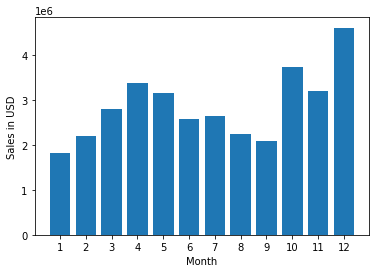

In [23]:
months = range(1,13)
plt.bar(months, sales_per_month)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')

### Which city have maximum order?

### At What time sales of product purchase is maximum?

In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95


In [25]:
('136 Church St, New York City, NY 10001').split(',')[1]

' New York City'

In [26]:
all_data['City'] = all_data['Purchase Address'].apply(lambda c: c.split(',')[1])

In [27]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95,Atlanta


<AxesSubplot:xlabel='City'>

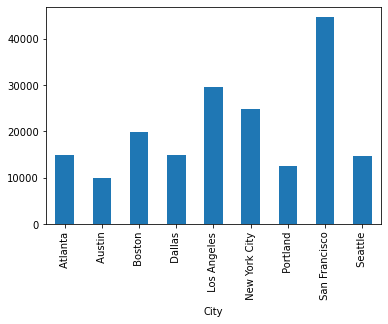

In [28]:
all_data.groupby('City')['City'].count().plot(kind='bar')

In [29]:

'12/29/19 07:03'.split('/')[2].split(' ')[1].split(':')[0]

'07'

In [30]:
def hour(x):
    return x.split('/')[2].split(' ')[1].split(':')[0]

In [31]:
all_data['hour']= all_data['Order Date'].apply(hour)

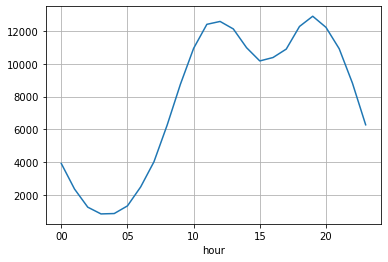

In [32]:
all_data.groupby('hour')['hour'].count().plot()
plt.grid()

### What product sold the most? Why?
### What products are most often sold together?

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,month,Sales,City,hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00,New York City,00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00,New York City,07
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95,Atlanta,12


<AxesSubplot:xlabel='Product'>

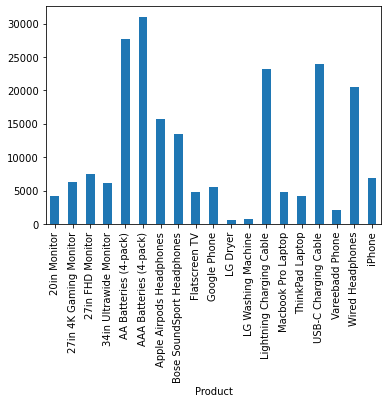

In [34]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [35]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [36]:
all_data.groupby('Product')['Quantity Ordered'].sum().index

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [37]:
all_data['Product'].unique()

array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
       '27in FHD Monitor', 'AA Batteries (4-pack)',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
       'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
       'iPhone', '20in Monitor', '34in Ultrawide Monitor',
       'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
      dtype=object)

In [38]:
products = all_data['Product'].unique()
quantity = all_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_data.groupby('Product')['Price Each'].mean()

/var/folders/99/0z21cd193p1620r6_n73gk940000gn/T/ipykernel_16181/1222487473.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical')


[Text(0, 0, 'Macbook Pro Laptop'),
 Text(1, 0, 'LG Washing Machine'),
 Text(2, 0, 'USB-C Charging Cable'),
 Text(3, 0, '27in FHD Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'Bose SoundSport Headphones'),
 Text(6, 0, 'AAA Batteries (4-pack)'),
 Text(7, 0, 'ThinkPad Laptop'),
 Text(8, 0, 'Lightning Charging Cable'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'Wired Headphones'),
 Text(11, 0, 'Apple Airpods Headphones'),
 Text(12, 0, 'Vareebadd Phone'),
 Text(13, 0, 'iPhone'),
 Text(14, 0, '20in Monitor'),
 Text(15, 0, '34in Ultrawide Monitor'),
 Text(16, 0, 'Flatscreen TV'),
 Text(17, 0, '27in 4K Gaming Monitor'),
 Text(18, 0, 'LG Dryer')]

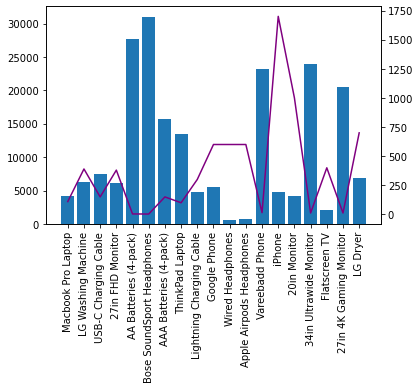

In [39]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #create a twin Axes sharing the x axis
ax1.bar(products,quantity)
ax2.plot(products,prices,color='purple')
ax1.set_xticklabels(products,rotation = 'vertical')

In [40]:
filter_d= all_data['Order ID'].duplicated(keep=False)
df = all_data[filter_d]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,month,Sales,City,hour
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,600.00,Boston,12
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,11.99,Boston,12
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",NaN,12,400.00,New York City,14
37,295698,USB-C Charging Cable,2,11.95,12/13/19 14:32,"175 1st St, New York City, NY 10001",NaN,12,23.90,New York City,14
42,295703,AA Batteries (4-pack),1,3.84,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",NaN,12,3.84,Austin,12
43,295703,Bose SoundSport Headphones,1,99.99,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",NaN,12,99.99,Austin,12
66,295726,iPhone,1,700.00,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",NaN,12,700.00,Boston,14
67,295726,Lightning Charging Cable,1,14.95,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",NaN,12,14.95,Boston,14


In [41]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/var/folders/99/0z21cd193p1620r6_n73gk940000gn/T/ipykernel_16181/2073116021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [42]:
df = df.drop_duplicates(subset=['Order ID'])

In [43]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,month,Sales,City,hour,Grouped
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",NaN,12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",NaN,12,3.84,Austin,12,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700.00,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",NaN,12,700.00,Boston,14,"iPhone,Lightning Charging Cable"
76,295735,iPhone,1,700.00,12/22/19 18:25,"374 Lincoln St, New York City, NY 10001",NaN,12,700.00,New York City,18,"iPhone,Apple Airpods Headphones,Wired Headphones"


<AxesSubplot:ylabel='Grouped'>

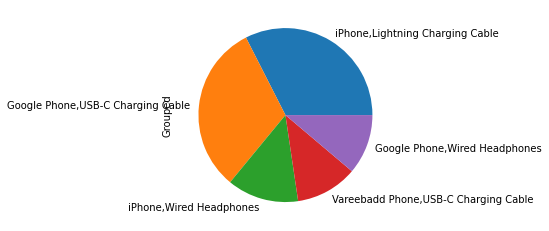

In [44]:
df['Grouped'].value_counts().head(5).plot.pie()

In [46]:
all_data.groupby('Order ID')['Sales'].sum().mean()

193.300918362983